### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했 (불가시 구매수량)는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
- InvoiceNo: 거래 번호
- StockCode: 상품 코드
- Description: 상품명 
- InvoiceDate: 거래 날짜
- UnitPrice: 상품 단가
- CustomerID: 고객 번호
- Country: 국가명

In [1]:
import pandas as pd
import numpy as np

co_df = pd.read_csv('./datasets/customer_invoice_data.csv')
co_df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [2]:
co_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
co_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
data = co_df[['InvoiceNo', 'CustomerID' ,'Quantity' ,'UnitPrice', 'InvoiceDate' ,'Country']]
data.columns = ['InvoiceNo', 'CustomerID' ,'Quantity' ,'UnitPrice', 'Date' ,'city']
data = data.copy()
data['CustomerID'] = data['CustomerID'].astype(str).str.replace('\.0', '', regex=True).replace('nan', 'Unknown')

# 변경된 값의 빈도수 계산
value_counts = data['CustomerID'].value_counts()

# 결과 출력
data

,InvoiceNo,CustomerID,Quantity,UnitPrice,Date,city
0,536365,17850,6,2.55,12/1/2010 8:26,United Kingdom
1,536365,17850,6,3.39,12/1/2010 8:26,United Kingdom
2,536365,17850,8,2.75,12/1/2010 8:26,United Kingdom
3,536365,17850,6,3.39,12/1/2010 8:26,United Kingdom
4,536365,17850,6,3.39,12/1/2010 8:26,United Kingdom
...,...,...,...,...,...,...
541904,581587,12680,12,0.85,12/9/2011 12:50,France
541905,581587,12680,6,2.10,12/9/2011 12:50,France
541906,581587,12680,4,4.15,12/9/2011 12:50,France
541907,581587,12680,4,4.15,12/9/2011 12:50,France


In [5]:
data.isnull().sum()

InvoiceNo     0
CustomerID    0
Quantity      0
UnitPrice     0
Date          0
city          0
dtype: int64

### 해야할일
- 날짜 거래 마지막일 기준으로 일 단위 날짜로 변환
- 데이터 중에 수량이 - or 개당 가격이 0인것들이 존재 지워줍니다.
- totlaprice 구해서 넣기
- 회원기준으로 / count(이용횟수 추가)

In [6]:
import pandas as pd

# 데이터프레임 예시

df = pd.DataFrame(data)

# 'Date' 열을 datetime 형식으로 변환
data['Date'] = pd.to_datetime(df['Date'])

# 송장번호 최대 날짜 구하기
InvoiceDate_max = data['Date'].max()

# InvoiceDate 최대 날짜로부터 지난 구매 날짜로 변경하기 (Recency)
data['Recency'] = (InvoiceDate_max - data['Date']).dt.days
data.drop(columns=['Date'], inplace=True)
# 결과 출력
data


,InvoiceNo,CustomerID,Quantity,UnitPrice,city,Recency
0,536365,17850,6,2.55,United Kingdom,373
1,536365,17850,6,3.39,United Kingdom,373
2,536365,17850,8,2.75,United Kingdom,373
3,536365,17850,6,3.39,United Kingdom,373
4,536365,17850,6,3.39,United Kingdom,373
...,...,...,...,...,...,...
541904,581587,12680,12,0.85,France,0
541905,581587,12680,6,2.10,France,0
541906,581587,12680,4,4.15,France,0
541907,581587,12680,4,4.15,France,0


In [7]:
# Quantity와 UnitPrice가 0 또는 음수인 행 제거
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
data

,InvoiceNo,CustomerID,Quantity,UnitPrice,city,Recency
0,536365,17850,6,2.55,United Kingdom,373
1,536365,17850,6,3.39,United Kingdom,373
2,536365,17850,8,2.75,United Kingdom,373
3,536365,17850,6,3.39,United Kingdom,373
4,536365,17850,6,3.39,United Kingdom,373
...,...,...,...,...,...,...
541904,581587,12680,12,0.85,France,0
541905,581587,12680,6,2.10,France,0
541906,581587,12680,4,4.15,France,0
541907,581587,12680,4,4.15,France,0


In [8]:
# totlaprice 구해서 넣기
data = pd.DataFrame(data)
data['totalPrice'] = data['Quantity'] * data['UnitPrice']
data

,InvoiceNo,CustomerID,Quantity,UnitPrice,city,Recency,totalPrice
0,536365,17850,6,2.55,United Kingdom,373,15.30
1,536365,17850,6,3.39,United Kingdom,373,20.34
2,536365,17850,8,2.75,United Kingdom,373,22.00
3,536365,17850,6,3.39,United Kingdom,373,20.34
4,536365,17850,6,3.39,United Kingdom,373,20.34
...,...,...,...,...,...,...,...
541904,581587,12680,12,0.85,France,0,10.20
541905,581587,12680,6,2.10,France,0,12.60
541906,581587,12680,4,4.15,France,0,16.60
541907,581587,12680,4,4.15,France,0,16.60


In [9]:
# 주문 횟수 만들기
data['OrderCount'] = data.groupby('CustomerID')['CustomerID'].transform('count')
data.loc[data['CustomerID'] == 'Unknown', 'OrderCount'] = 0
# 결과 출력
data
# data.groupby('InvoiceNo').ngroups

,InvoiceNo,CustomerID,Quantity,UnitPrice,city,Recency,totalPrice,OrderCount
0,536365,17850,6,2.55,United Kingdom,373,15.30,297
1,536365,17850,6,3.39,United Kingdom,373,20.34,297
2,536365,17850,8,2.75,United Kingdom,373,22.00,297
3,536365,17850,6,3.39,United Kingdom,373,20.34,297
4,536365,17850,6,3.39,United Kingdom,373,20.34,297
...,...,...,...,...,...,...,...,...
541904,581587,12680,12,0.85,France,0,10.20,52
541905,581587,12680,6,2.10,France,0,12.60,52
541906,581587,12680,4,4.15,France,0,16.60,52
541907,581587,12680,4,4.15,France,0,16.60,52


In [10]:

rfm = data[['Recency', 'OrderCount', 'totalPrice']].copy()

# 새로운 데이터프레임의 열 이름 변경
rfm.columns = ['Recency', 'Frequency', 'Monetary']

rfm

,Recency,Frequency,Monetary
0,373,297,15.30
1,373,297,20.34
2,373,297,22.00
3,373,297,20.34
4,373,297,20.34
...,...,...,...
541904,0,52,10.20
541905,0,52,12.60
541906,0,52,16.60
541907,0,52,16.60


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rfm[['Recency', 'Frequency', 'Monetary']] = \
                                    scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
# 최근일 수록 숫자가 더 작게 나오기 때문에, 1을 빼준 값으로 점수를 계산한다.
rfm['Recency'] = 1 - rfm['Recency']
rfm

,Recency,Frequency,Monetary
0,0.0,0.037849,0.000091
1,0.0,0.037849,0.000121
2,0.0,0.037849,0.000131
3,0.0,0.037849,0.000121
4,0.0,0.037849,0.000121
...,...,...,...
541904,1.0,0.006627,0.000061
541905,1.0,0.006627,0.000075
541906,1.0,0.006627,0.000099
541907,1.0,0.006627,0.000099


In [12]:
rfm[['Recency', 'Frequency', 'Monetary']].mean()



Recency      0.578755
Frequency    0.063347
Monetary     0.000119
dtype: float64

In [13]:
data['TotalScore'] = rfm['Recency'] + rfm['Frequency'] + rfm['Monetary']
data

,InvoiceNo,CustomerID,Quantity,UnitPrice,city,Recency,totalPrice,OrderCount,TotalScore
0,536365,17850,6,2.55,United Kingdom,373,15.30,297,0.037940
1,536365,17850,6,3.39,United Kingdom,373,20.34,297,0.037970
2,536365,17850,8,2.75,United Kingdom,373,22.00,297,0.037979
3,536365,17850,6,3.39,United Kingdom,373,20.34,297,0.037970
4,536365,17850,6,3.39,United Kingdom,373,20.34,297,0.037970
...,...,...,...,...,...,...,...,...,...
541904,581587,12680,12,0.85,France,0,10.20,52,1.006687
541905,581587,12680,6,2.10,France,0,12.60,52,1.006702
541906,581587,12680,4,4.15,France,0,16.60,52,1.006725
541907,581587,12680,4,4.15,France,0,16.60,52,1.006725


In [14]:
import numpy as np

l1, l2, l3, l4 = np.percentile(data['TotalScore'], [20, 40, 60, 80])
print(l1, l2, l3, l4)

0.2869221478690078 0.5501834351186269 0.7918870256475905 0.9423081658463829


In [15]:
def get_level(x):
    if x <= l1:
        return 5
    if x > l1 and x <= l2:
        return 4
    if x > l2 and x <= l3:
        return 3
    if x > l3 and x <= l4:
        return 2
    return 1

In [16]:
data['Level'] = data['TotalScore'].apply(get_level)
data['Level'] = data['Level'].replace([5, 4, 3, 2, 1], ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])
print(data['Level'].value_counts())
data

Level
Bronze     106024
Diamond    106022
Silver     106020
VIP        106020
Gold       106018
Name: count, dtype: int64


,InvoiceNo,CustomerID,Quantity,UnitPrice,city,Recency,totalPrice,OrderCount,TotalScore,Level
0,536365,17850,6,2.55,United Kingdom,373,15.30,297,0.037940,Bronze
1,536365,17850,6,3.39,United Kingdom,373,20.34,297,0.037970,Bronze
2,536365,17850,8,2.75,United Kingdom,373,22.00,297,0.037979,Bronze
3,536365,17850,6,3.39,United Kingdom,373,20.34,297,0.037970,Bronze
4,536365,17850,6,3.39,United Kingdom,373,20.34,297,0.037970,Bronze
...,...,...,...,...,...,...,...,...,...,...
541904,581587,12680,12,0.85,France,0,10.20,52,1.006687,VIP
541905,581587,12680,6,2.10,France,0,12.60,52,1.006702,VIP
541906,581587,12680,4,4.15,France,0,16.60,52,1.006725,VIP
541907,581587,12680,4,4.15,France,0,16.60,52,1.006725,VIP


In [17]:
print(data['city'].value_counts())

city
United Kingdom          485123
Germany                   9040
France                    8407
EIRE                      7890
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1966
Portugal                  1501
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Leb

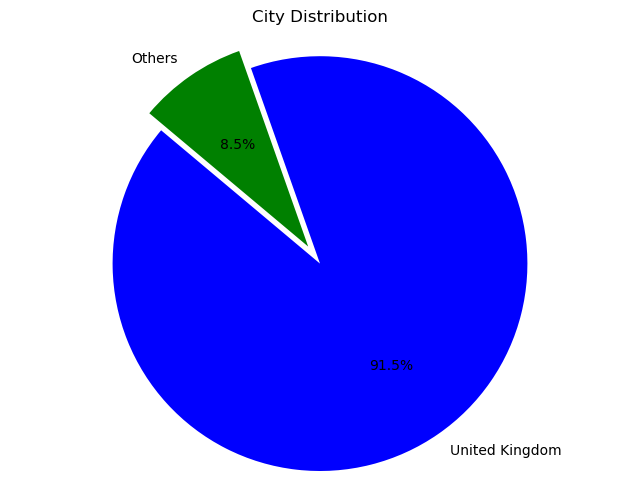

In [18]:
import matplotlib.pyplot as plt

# 도시별 빈도수 계산
city_counts = data['city'].value_counts()

# 영국과 그 외 도시로 나누기
uk_count = city_counts.get('United Kingdom', 0)
other_count = city_counts.sum() - uk_count

# 원 그래프 데이터
sizes = [uk_count, other_count]
labels = ['United Kingdom', 'Others']
colors = ['blue', 'green']
explode = (0.1, 0)  # 첫 번째 조각을 조금 떼어내기 위한 설정

# 원 그래프 그리기
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # 원 그래프를 원형으로 유지
plt.title('City Distribution')
plt.show()


In [19]:
total_price_by_city = data.groupby('city')['totalPrice'].sum()
total_price_by_city_sorted = total_price_by_city.sort_values(ascending=False)
print(total_price_by_city_sorted)
# United Kingdom을 제외한 도시들의 totalPrice를 구하기
total_price_excluding_uk = total_price_by_city_sorted.drop('United Kingdom').sum()

print("United Kingdom을 제외한 나머지 도시들의 총 totalPrice:", total_price_excluding_uk)
# United Kingdom 도시의 totalPrice 출력
total_price_uk = total_price_by_city_sorted.loc['United Kingdom']
print("United Kingdom의 총 totalPrice:", total_price_uk)

# 영국의 수익비중이 84%

city
United Kingdom          9025222.084
Netherlands              285446.340
EIRE                     283453.960
Germany                  228867.140
France                   209715.110
Australia                138521.310
Spain                     61577.110
Switzerland               57089.900
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33747.100
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Hong Kong                 15691.800
Cyprus                    13590.380
Austria                   10198.680
Israel                     8135.260
Poland                     7334.650
Greece                     4760.520
Unspecified                4749.790
Iceland                    4310.000
Canada                     3666.380
USA                    

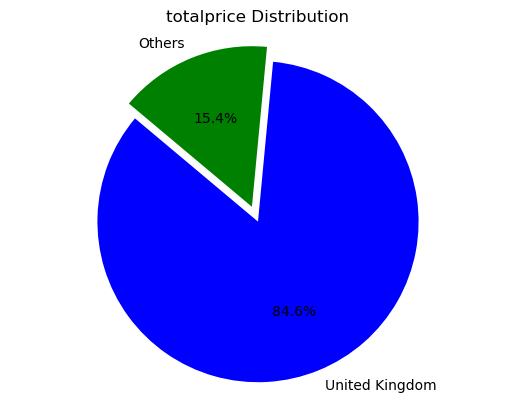

In [20]:
import matplotlib.pyplot as plt

# 전체 도시의 totalPrice 합계
total_price_all_cities = total_price_by_city_sorted.sum()

# 영국의 수익 비중 계산
uk_revenue_ratio = total_price_uk / total_price_all_cities * 100

# 나머지 도시들의 수익 비중 계산
other_revenue_ratio = total_price_excluding_uk / total_price_all_cities * 100

# 원 그래프 시각화
labels = ['United Kingdom', 'Others']
sizes = [uk_revenue_ratio, other_revenue_ratio]
colors = ['blue', 'green']
explode = (0.1, 0)  # 첫 번째 조각을 조금 떼어내기 위한 설정

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # 원 그래프를 원형으로 유지
plt.title('totalprice Distribution')
plt.show()


In [21]:
# OrderCount가 200 이상인 행만 필터링
filtered_data = data[data['OrderCount'] > 250]

# 필터링된 데이터를 city 열로 그룹화하고 도시별 개수를 세기
city_counts = filtered_data['city'].value_counts()

print(city_counts)


city
United Kingdom     150724
EIRE                 7075
France               3405
Germany              3256
Netherlands          2076
Spain                1097
Australia             714
Portugal              681
Norway                420
Channel Islands       364
Switzerland           354
Finland               294
Belgium               266
Name: count, dtype: int64


In [22]:
# Level이 VIP인 행만 필터링
vip_customers = data[data['Level'] == 'VIP']

# 필터링된 데이터를 city 열로 그룹화하고 도시별 개수를 세기
city_counts_for_vip = vip_customers['city'].value_counts()

print(city_counts_for_vip)


city
United Kingdom     95274
EIRE                5382
France              1346
Germany             1234
Netherlands          953
Spain                305
Norway               224
Portugal             221
Belgium              214
Italy                182
Cyprus               100
Denmark               94
Switzerland           81
Channel Islands       78
Finland               73
Austria               44
Australia             40
Greece                36
Unspecified           34
USA                   32
Japan                 32
Sweden                18
Malta                 12
Iceland               11
Name: count, dtype: int64


In [23]:
average_price_by_city = data.groupby('city')['totalPrice'].mean()
average_price_by_city_sorted = average_price_by_city.sort_values(ascending=False)
print(average_price_by_city_sorted)

city
Netherlands             121.003111
Australia               117.192310
Japan                   116.561900
Singapore                95.852658
Sweden                   85.096075
Hong Kong                55.252817
Denmark                  49.882474
Lithuania                47.458857
Bahrain                  41.896667
Lebanon                  37.641778
EIRE                     35.925724
Brazil                   35.737500
Norway                   33.767918
Czech Republic           33.069600
Finland                  32.913985
Greece                   32.831172
Switzerland              29.038606
United Arab Emirates     27.974706
Israel                   27.577153
Channel Islands          27.340160
Austria                  25.624824
Germany                  25.317162
France                   24.945297
Spain                    24.789497
Malta                    24.335625
Canada                   24.280662
Iceland                  23.681319
Italy                    23.064960
Portugal       

In [24]:
average_price_by_city = data.groupby('city')['OrderCount'].mean()
average_price_by_city_sorted = average_price_by_city.sort_values(ascending=False)
print(average_price_by_city_sorted)


city
EIRE                    4333.529278
Netherlands             1834.312421
Australia                482.986464
United Kingdom           449.258561
France                   240.764482
Spain                    234.456924
Norway                   230.544351
Singapore                222.000000
Channel Islands          218.796791
Germany                  213.431416
Portugal                 188.551632
Iceland                  182.000000
Cyprus                   168.452769
Finland                  155.417518
Switzerland              155.312818
Belgium                  137.096012
Japan                    135.722741
Canada                   121.529801
Sweden                   113.261641
Israel                   109.308475
Poland                   100.678788
Austria                   83.090452
Italy                     82.329815
USA                       71.681564
Denmark                   71.605263
European Community        60.000000
Malta                     58.160714
RSA                    

In [25]:
ci_rf_df = co_df[co_df['Quantity'] >= 0]
ci_rf_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [26]:
ci_rf_df.loc[:, 'Recency'] = pd.to_datetime(co_df['InvoiceDate'])\
                    .apply(lambda x: (pd.to_datetime('2011-12-10') - x).days)
ci_rf_df

C:\Users\HANSUNG\AppData\Local\Temp\ipykernel_20540\4183503375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_rf_df.loc[:, 'Recency'] = pd.to_datetime(co_df['InvoiceDate'])\


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,373
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,373
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,0


In [27]:
ci_rf_df = ci_rf_df.drop(['InvoiceDate'], axis=1)

In [28]:
rf_df = ci_rf_df.groupby('CustomerID').agg(Recency=('Recency', 'min'), Frequency=('CustomerID', 'count'))
rf_df

,Recency,Frequency
CustomerID,,
12346.0,325,1
12347.0,2,182
12348.0,75,31
12349.0,18,73
12350.0,310,17
...,...,...
18280.0,277,10
18281.0,180,7
18282.0,7,12


In [30]:
m_df = co_df.copy()
m_df.loc[:, 'Monetary'] = m_df['Quantity'] * m_df['UnitPrice']
m_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [31]:
m_df = m_df.groupby('CustomerID')[['Monetary']].sum()
m_df

,Monetary
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [32]:
rf_df = rf_df.reset_index()
rf_df

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12347.0,2,182
2,12348.0,75,31
3,12349.0,18,73
4,12350.0,310,17
...,...,...,...
4334,18280.0,277,10
4335,18281.0,180,7
4336,18282.0,7,12
4337,18283.0,3,756


In [33]:
m_df = m_df.reset_index()
m_df

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [34]:
rfm_df = rf_df.merge(m_df, on='CustomerID')
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,0.00
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40
...,...,...,...,...
4334,18280.0,277,10,180.60
4335,18281.0,180,7,80.82
4336,18282.0,7,12,176.60
4337,18283.0,3,756,2094.88


In [35]:
rfm_df.iloc[rfm_df[rfm_df['Monetary'] < 0].index] = 0
rfm_df[rfm_df['Monetary'] < 0]

,CustomerID,Recency,Frequency,Monetary


In [36]:
from sklearn.preprocessing import MinMaxScaler

rfm_scale = MinMaxScaler()
rfm_scale = rfm_scale.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

In [37]:
rfm_df[['Recency', 'Frequency', 'Monetary']] = pd.DataFrame(rfm_scale, columns=['Recency', 'Frequency', 'Monetary'])
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346.0,0.871314,0.000127,0.000000
1,12347.0,0.005362,0.023194,0.015421
2,12348.0,0.201072,0.003951,0.006430
3,12349.0,0.048257,0.009303,0.006288
4,12350.0,0.831099,0.002166,0.001196
...,...,...,...,...
4334,18280.0,0.742627,0.001274,0.000646
4335,18281.0,0.482574,0.000892,0.000289
4336,18282.0,0.018767,0.001529,0.000632
4337,18283.0,0.008043,0.096343,0.007495


In [38]:
rfm_df['Recency'] = 1 - rfm_df['Recency']

In [39]:
rfm_df.loc[:, 'TotalScore'] = rfm_df['Recency'] + rfm_df['Frequency'] + rfm_df['Monetary']
rfm_df

,CustomerID,Recency,Frequency,Monetary,TotalScore
0,12346.0,0.128686,0.000127,0.000000,0.128814
1,12347.0,0.994638,0.023194,0.015421,1.033253
2,12348.0,0.798928,0.003951,0.006430,0.809309
3,12349.0,0.951743,0.009303,0.006288,0.967334
4,12350.0,0.168901,0.002166,0.001196,0.172264
...,...,...,...,...,...
4334,18280.0,0.257373,0.001274,0.000646,0.259293
4335,18281.0,0.517426,0.000892,0.000289,0.518608
4336,18282.0,0.981233,0.001529,0.000632,0.983394
4337,18283.0,0.991957,0.096343,0.007495,1.095795


In [40]:
ci_rfm_df = co_df.merge(rfm_df[['CustomerID', 'TotalScore']], on='CustomerID')
ci_rfm_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalScore
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0.059452
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.059452
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0.059452
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.059452
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.059452
...,...,...,...,...,...,...,...,...,...
406592,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/2011 12:16,1.25,12713.0,Germany,1.007879
406593,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/9/2011 12:16,0.85,12713.0,Germany,1.007879
406594,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/9/2011 12:16,0.85,12713.0,Germany,1.007879
406595,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/2011 12:16,2.08,12713.0,Germany,1.007879


In [41]:
import numpy as np

l1, l2, l3, l4 = np.percentile(ci_rfm_df['TotalScore'], [20, 40, 70, 90])
print(l1, l2, l3, l4)

0.869671483418675 0.9705318110522853 1.0420786444685686 1.2380770969461894


In [42]:
def get_level(x):
    if x <= l1:
        return 5
    if x <= l2:
        return 4
    if x <= l3:
        return 3
    if x <= l4:
        return 2
    return 1

In [43]:
ci_rfm_df['Level'] = ci_rfm_df['TotalScore'].apply(get_level)
ci_rfm_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalScore,Level
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0.059452,5
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.059452,5
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0.059452,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.059452,5
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.059452,5
...,...,...,...,...,...,...,...,...,...,...
406592,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/2011 12:16,1.25,12713.0,Germany,1.007879,3
406593,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/9/2011 12:16,0.85,12713.0,Germany,1.007879,3
406594,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/9/2011 12:16,0.85,12713.0,Germany,1.007879,3
406595,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/2011 12:16,2.08,12713.0,Germany,1.007879,3


In [44]:
ci_rfm_df['Level'] = ci_rfm_df['Level'].replace([5, 4, 3, 2, 1], 
                                                ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP'])

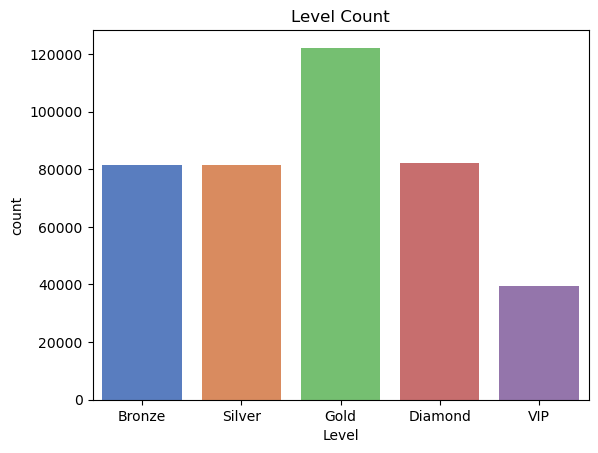

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Bronze', 'Silver', 'Gold', 'Diamond', 'VIP']

sns.countplot(x = 'Level', data=ci_rfm_df, palette='muted', order=order)
plt.title('Level Count')
plt.show()

In [46]:
# United Kingdom 국가인 데이터 필터링
uk_rfm_df = ci_rfm_df[ci_rfm_df['Country'] == 'United Kingdom']

# Level별로 UnitPrice와 Quantity의 곱한 값 합치기
total_price_by_level = uk_rfm_df.groupby('Level').apply(lambda x: (x['UnitPrice'] * x['Quantity']).sum())

# 결과 출력
print(total_price_by_level)


Level
Bronze     1248691.993
Diamond    1670518.720
Gold       1788051.510
Silver     1105968.351
VIP         966506.520
dtype: float64


In [48]:
# United Kingdom 국가인 데이터 필터링
uk_rfm_df = ci_rfm_df[ci_rfm_df['Country'] == 'United Kingdom']

# Level별로 UnitPrice와 Quantity의 곱한 값 합치기
total_price_by_level = uk_rfm_df.groupby('Level').apply(['Quantity']).sum()

# 결과 출력
print(total_price_by_level)


TypeError: unhashable type: 'list'

### 마케팅 전략 제안


> 전체 거래의 91% / 거래 대금의 84% 는 영국에서 발생하였다.  
> 1인당 구매금액이 낮은편이라 물품을 판매할때 관련된 상품을 제공하며 한번에 여러물품을 구매하도록 유도해야한다.  
> 영국 배송담당 허브에 투자하여 고객 편의를 향상시킨다.

> 네덜란드는 다른 국가에 비해 전체 구매가격, 평균 구매가격, 1인당 구매율이 높다.  
> 영국을 제외한 나라에 마케팅을 진행한다면 네덜란드에 집중적인 마케팅을 해야한다.  


